# Post-Pandemic Recovery in the Philippines: Mapping Employment and Wage Dynamics Across Industries (2019-2023)
## Econ 138 Capstone Project
**Group 9**  
Chinjen, Christa Renee M.  
Lim, Liam Trevor C.  
Ventura, Martin Lorenzo R.  

In [18]:
import pandas as pd  
import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

os.chdir('/Users/christareneechinjen/Desktop/Econ 138/capstone/data//')
files = [f for f in os.listdir('/Users/christareneechinjen/Desktop/Econ 138/capstone/data//') if f.lower().endswith('.csv')]
print(files)

['LFS PUF December 2023.CSV', 'LFS PUF October 2021 - HHMEM.CSV', 'LFS PUF December 2022.CSV', 'LFS PUF February 2021.csv', 'LFS PUF February 2022.csv', 'LFS PUF September 2021 - HHMEM.CSV', 'LFS PUF February 2023.CSV', 'LFS PUF November 2021 - HHMEM.CSV', 'LFS PUF April 2019.CSV', 'LFS PUF March 2023.CSV', 'LFS PUF September 2022.CSV', 'LFS PUF April 2020.CSV', 'LFS PUF April 2021.csv', 'LFS PUF September 2023.CSV', 'LFS PUF March 2022.csv', 'LFS PUF April 2023.CSV', 'LFS PUF April 2022.csv', 'LFS PUF March 2021.csv', 'LFS PUF July 2019.CSV', 'LFS PUF May 2021.csv', 'LFS PUF November 2022.CSV', 'LFS PUF December 2021 - HHMEM.CSV', 'LFS PUF May 2023.CSV', 'LFS PUF May 2022.csv', 'LFS PUF November 2023.CSV', 'LFS PUF June 2022.csv', 'LFS PUF July 2022.CSV', 'LFS PUF July 2023.CSV', 'LFS PUF June 2023.CSV', 'LFS PUF June 2021.csv', 'LFS PUF July 2021.csv', 'LFS PUF July 2020.CSV', 'LFS PUF January 2020.CSV', 'LFS PUF October 2020.csv', 'LFS PUF January 2021.csv', 'LFS PUF January 2023.CS

In [20]:
#show all columns without truncation
pd.set_option('display.max_columns', None)       
#show all rows without truncation
pd.set_option('display.max_rows', None)
#show all columns without getting clipped
pd.set_option('display.max_colwidth', None)      

## 01 | Data Cleaning ##

In [23]:
def map_occupation(occupation_code):
    if occupation_code in range(11, 15):
        return 'Managers'
    elif occupation_code in range(21, 27):
        return 'Professionals'
    elif occupation_code in range(31, 36):
        return 'Technicians and Associate Professionals'
    elif occupation_code in range(41, 45):
        return 'Clerical Support Workers'
    elif occupation_code in range(51, 55):
        return 'Service and Sales Workers'
    elif occupation_code in range(61, 64):
        return 'Skilled Agricultural, Forestry and Fishery Workers'
    elif occupation_code in range(71, 76):
        return 'Craft and Related Trades Workers'
    elif occupation_code in range(81, 84):
        return 'Plant and Machine Operators and Assemblers'
    elif occupation_code in range(91, 97):
        return 'Elementary Occupations'
    elif occupation_code in range(1, 4):
        return 'Armed Forces Occupations'
    else:
        return 'Unknown'

def map_education(grade):
    if grade in [1000, 2000]:
        return "No grade completed"
    elif grade in [10010, 10002]:
        return "Elementary Undergraduate"
    elif grade == 10020:
        return "Elementary Graduate"
    elif grade in [24010, 24002]:
        return "Junior High Undergraduate"
    elif grade == 24020:
        return "Junior High Completed"
    elif grade in [34011, 34021, 34031, 35001]:
        return "Senior High Undergraduate"
    elif grade in [34012, 34022, 34032, 35002]:
        return "Senior High Graduate"
    elif grade in [40010, 50010]:
        return "Post Secondary Undergraduate"
    elif 40011 <= grade <= 49999 or 50011 <= grade <= 59999:
        return "Post Secondary Graduate"
    elif grade == 60010:
        return "College Undergraduate"
    elif grade == 60000 or (60011 <= grade <= 69999) or (70000 <= grade <= 79999) or (80000 <= grade <= 89999):
        return "College Graduate"
    else:
        return "Other"

def classify_sector(code):
    try:
        code = int(code)
        if 1 <= code <= 3:
            return 'AGRICULTURE'
        elif 5 <= code <= 43:
            return 'INDUSTRY'
        elif 45 <= code <= 99:
            return 'SERVICES'
        else:
            return 'OTHER'
    except:
        return 'UNKNOWN'

def map_region(region):
    if region == 13:
        return "NCR"
    else:
        return "Outside NCR"

This maps numerical occupation codes into **occupation groups** by taking a numerical input (`occupation_code`) and returning the corresponding occupation group as a string. Similarly, numerical education codes are also mapped to **education levels** by taking a numerical input (`grade`) and returning the corresponding education level as a string. Also, numerical industry codes are mapped to **sectors** by taking a numerical input (`code`) and returning the corresponding sector as a string. Next, the region codes are mapped in order to classify whether an individual is from **NCR** or **Outside NCR**, wherein the region code 13 corresponds to NCR. 

The occupation, education, sector, and region codes are grouped into broader categories with descriptive labels for a more understandable model, analysis, and visualization. Their ranges are based on the variable dictionay of the LFS survey. 

In [26]:
df_list = []

for file in files:
    temp_df = pd.read_csv(file, low_memory=False)
    if 'PUFC25_PBASIC' in temp_df.columns:
        df_list.append(temp_df)
    else:
        print(f"Skipping file (missing PUFC25_PBASIC): {file}")

data = pd.concat(df_list,ignore_index=True)

Skipping file (missing PUFC25_PBASIC): LFS PUF December 2023.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF December 2022.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF February 2021.csv
Skipping file (missing PUFC25_PBASIC): LFS PUF February 2022.csv
Skipping file (missing PUFC25_PBASIC): LFS PUF September 2021 - HHMEM.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF February 2023.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF November 2021 - HHMEM.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF March 2023.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF September 2022.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF September 2023.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF March 2022.csv
Skipping file (missing PUFC25_PBASIC): LFS PUF March 2021.csv
Skipping file (missing PUFC25_PBASIC): LFS PUF May 2021.csv
Skipping file (missing PUFC25_PBASIC): LFS PUF November 2022.CSV
Skipping file (missing PUFC25_PBASIC): LFS PUF December 2021 - HHMEM.CSV
Skipping fil

We exclude datasets that have no wage data. First, an empty list is created. Then, each file path in the `files` list is looped through, reading them into a temporary DataFrame (`temp_df`). If the column `PUFC25_PBASIC` (basic pay column) exists in that file, the DataFrame is added to `df_list`. Lastly, the DataFrames in `df_list` are concatenated into one DataFrame called `data`. 

In [28]:
cols = ['PUFSVYMO', 'PUFSVYYR', 'PUFC05_AGE','PUFC11_WORK', 'PUFC12_JOB', 
        'PUFC14_PROCC', 'PUFC16_PKB', 'PUFC04_SEX', 'PUFNEWEMPSTAT',
        'PUFC27_NJOBS', 'PUFC28_THOURS', 'PUFC18_PNWHRS', 
        'PUFC19_PHOURS','PUFC25_PBASIC', 'PUFC07_GRADE', 'PUFREG'] 
data = data[cols]
data = data.loc[:, ~data.columns.duplicated()]

We include relevant columns and remove irrelevant columns. We also remove duplicate columns. The following columns are kept: 
- `PUFSVYMO`- Survey Month
- `PUFSVYYR` - Survey Year
- `PUFC05_AGE` - Age
- `PUFC11_WORK` - Work Indicator
- `PUFC12_JOB` - Job Indicator
- `PUFC14_PROCC` - Primary Occupation
- `PUFC16_PKB` - Kind of Business (Primary Occupation) 
- `PUFC04_SEX` - Sex
- `PUFNEWEMPSTAT` - New Employment Criteria
- `PUFC27_NJOBS`- Number of Jobs during the past week 
- `PUFC28_THOURS` - Total Hours Worked for all Jobs
- `PUFC18_PNWHRS` - Normal Working Hours per Day
- `PUFC19_PHOURS` - Total Number of Hours Worked during the past week
- `PUFC25_PBASIC`- Basic Pay per Day (Primary Occupation)
- `PUFC07_GRADE` - Highest Grade Completed
- `PUFREG` - Region

In [30]:
bins = [15, 24, 34, 44, 54, 64, 100]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']

data['age group'] = pd.cut(data['PUFC05_AGE'], bins=bins, labels=labels, right=True)

This creates an age group categorization from the continuous age variable for a more understandable model, analysis, and visualization. `bins` defines the edges of each age group and `labels` defines the category names we want to assign to those bins. Then, `pd.cut()` is used to bin values in the `PUFC05_AGE` column into age groups, assigning correpsonding labels from the labels list. The results are stored in a new column called `age group`. 

In [35]:
# convert to numeric; clean strings and handle invalid entries
data['PUFC14_PROCC'] = pd.to_numeric(data['PUFC14_PROCC'].astype(str).str.strip(), errors='coerce')
data['PUFREG'] = pd.to_numeric(data['PUFREG'].astype(str).str.strip(), errors='coerce')
data['PUFC07_GRADE'] = pd.to_numeric(data['PUFC07_GRADE'].astype(str).str.strip(), errors='coerce')
data['PUFC25_PBASIC'] = pd.to_numeric(data['PUFC25_PBASIC'].astype(str).str.strip(), errors='coerce')
data['PUFC28_THOURS'] = pd.to_numeric(data['PUFC28_THOURS'].astype(str).str.strip(), errors='coerce')

# drop missing rows
data = data.dropna(subset=['PUFC25_PBASIC'])
data = data.dropna(subset=['PUFC28_THOURS'])

# ensure month codes are two digits 
data['PUFSVYMO'] = data['PUFSVYMO'].astype(str).str.zfill(2)

# convert survey year to integer and fix shorthand years
data['PUFSVYYR'] = data['PUFSVYYR'].astype(int)
data['PUFSVYYR'] = data['PUFSVYYR'].apply(lambda x: x + 2000 if x < 100 else x)

# combine year and month into a proper datetime format
data['date'] = pd.to_datetime(data['PUFSVYYR'].astype(str) + '-' + data['PUFSVYMO'] + '-01')

# extract year and months from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# apply the mapping
data['education_level'] = data["PUFC07_GRADE"].apply(map_education)
data['region'] = data["PUFREG"].apply(map_region)
data['occupation'] = data["PUFC14_PROCC"].apply(map_occupation)

This performs further data cleaning and transformation to prepare the data for analysis. 
- Cleans and converts region, education grade, employment status, and total hours worked fields to numeric types, replacing invalid values with NaN.
- Removes rows with missing values.
- Standardizes date components by formatting month and fixing shorthand years, then combines them into a proper datetime object and extracts year and month.
- Creates new columns for education level, region, and occupation by applying the mapping functions.

## 02 | Cluster Profiling and Interpretation

In [38]:
# group by relevant demographic and employment characteristics
# then compute the mean total hours worked and median employment status (wage proxy)
grouped = data.groupby([
    'date', 'PUFC16_PKB', 'PUFC04_SEX', 'age group', 
    'education_level', 'region', 'year'
]).agg({
    'PUFC28_THOURS': 'mean',       # average hours worked
    'PUFC25_PBASIC': 'median'      # median employment classification (wage proxy)
}).reset_index()

# drop rows with missing values
grouped = grouped.dropna(subset=['PUFC28_THOURS'])
grouped = grouped.dropna(subset=['PUFC25_PBASIC'])

# classify employment sector using the PUFC16_PKB code
grouped['sector'] = grouped['PUFC16_PKB'].apply(classify_sector)

# rename columns for clarity
grouped.rename(columns={'PUFC28_THOURS': 'avg_hours_worked'}, inplace=True)
grouped.rename(columns={'PUFC25_PBASIC': 'avg_wage'}, inplace=True)

/var/folders/hg/mwfmq9xd5z177hn9h7346d400000gn/T/ipykernel_66209/4095776756.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([


This groups the dataset by key demographic and employment attributes and calculates the average hours worked and median basic pay classification for each group. It then removes any rows with missing values in those two key metrics. Afterward, it classifies each group's employment sector using the `PUFC16_PKB` code and renames the computed columns for clarity.

In [40]:
# calculate the national average wage per year
avg_wage_by_year = grouped.groupby('year')['avg_wage'].mean().reset_index()

# compute deviation from the national average hours worked within the same year
national_avg_hours = grouped.groupby('year')['avg_hours_worked'].transform('mean')
grouped['deviation_from_natl_hours'] = grouped['avg_hours_worked'] - national_avg_hours

# center the deviations by subtracting the overall mean of deviations
grouped['centered_deviation'] = grouped['deviation_from_natl_hours'] - grouped['deviation_from_natl_hours'].mean()

This first calculates the national average wage for each year. Then, it computes how much each group's average hours worked deviates from their respective year's national average. Finally, it centers these deviations by subtracting the overall mean deviation across all years to standardize the data for further analysis.

In [45]:
X = pd.concat([
    pd.get_dummies(grouped['sector'], prefix='sector'),
    pd.get_dummies(grouped['year'],prefix='year'),
    pd.get_dummies(grouped['region'],prefix='region'),
    pd.get_dummies(grouped['education_level'],prefix='education_level'),
    pd.get_dummies(grouped['PUFC04_SEX'], prefix='sex'),
    pd.get_dummies(grouped['age group'], prefix='age'),
    grouped[['avg_hours_worked','avg_wage']]
], axis=1)

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42) 
grouped['cluster'] = kmeans.fit_predict(X_scaled)

This constructs a feature matrix X by combining one-hot encoded demographic and employment variables with numerical features (`avg_hours_worked` and `avg_wage`). It then standardizes the features using StandardScaler to ensure uniform scaling across variables. Finally, it applies KMeans clustering to group similar observations and assigns each one a cluster label in the grouped DataFrame. We choose 3 clusters for a simple summary and exploration of the data. 

In [48]:
label_sex = LabelEncoder()
label_age = LabelEncoder()
label_industry = LabelEncoder()
grouped['sex_encoded'] = label_sex.fit_transform(grouped['PUFC04_SEX'])
grouped['age_encoded'] = label_age.fit_transform(grouped['age group'])
grouped['industry_encoded'] = label_industry.fit_transform(grouped['PUFC16_PKB'])

sector_mode = grouped.groupby('cluster')['sector'].agg(lambda x: x.mode()[0])
region_mode = grouped.groupby('cluster')['region'].agg(lambda x: x.mode()[0])
sex_mode = grouped.groupby('cluster')['PUFC04_SEX'].agg(lambda x: x.mode()[0])
educ_mode = grouped.groupby('cluster')['education_level'].agg(lambda x: x.mode()[0])
age_mode = grouped.groupby('cluster')['age group'].agg(lambda x: x.mode()[0])
avg_hours = grouped.groupby('cluster')['avg_hours_worked'].mean()
avg_wage = grouped.groupby('cluster')['avg_wage'].mean()

cluster_summary = pd.DataFrame({
    'Most Common Sector': sector_mode,
    'Most Common Region': region_mode,
    'Most Common Sex': sex_mode,
    'Most Common Educ Level' : educ_mode,
    'Most Common Age Group': age_mode,
    'Average Working Hours': avg_hours.round(2),
    'Average Wage': avg_wage.round(2)
})

print(cluster_summary) #we print cluster_summary to provide a tableview form for analysis
#code 4 block end

        Most Common Sector Most Common Region  Most Common Sex  \
cluster                                                          
0                 SERVICES        Outside NCR                2   
1                 SERVICES        Outside NCR                1   
2                 SERVICES        Outside NCR                1   

        Most Common Educ Level Most Common Age Group  Average Working Hours  \
cluster                                                                       
0             College Graduate                 25-34                  41.95   
1                        Other                 25-34                  42.92   
2          Elementary Graduate                 35-44                  44.83   

         Average Wage  
cluster                
0              560.81  
1              586.88  
2              343.18  


This summarizes each cluster from the K-Means model by identifying the most common demographic and work-related traits and calculating the average working hours and wages for each cluster. It also label-encodes categorical variables for future use. Finally, it prints a summary table that helps interpret what defines each group (cluster) of workers in the dataset.

### Clustering Interpretation ###
Each cluster represents a generalized socioeconomic profile based on different variables. These include sector, region, sex, education level, age group, average working hours, and average wage. Therefore, the clustering algorithm has grouped individuals not by a single trait, but by a multidimensional similarity. 

Based on the K-Means clustering results, we can interpret:  

- **Cluster 0: Educated young professionals**
  - Most common education: College graduate
  - Region: Outside NCR
  - Sex: Predominantly female
  - Age group: 25-34
  - Average hours worked: 41.95
  - Average predicted wage:₱560.81
  - Interpretation: This cluster could represent young females who are college-educated professionals working in rural areas. They are not residing in Metro Manila but they still have access to opportunities for high-earning wages and skilled occupations. These could include call center workers, teachers, administrative workers in government units or regional office, etc.
- **Cluster 1: Mid-level skilled workers**
    - Most Common Education: “Other” (possibly vocational or unclassified)
    - Region: Outside NCR
    - Sex: Predominantly male
    - Age Group: 25–34
    - Average Hours Worked: 42.92
    - Average Predicted Wage: ₱586.88
    - Interpretation: This cluster could represent male workers who have backgrounds that do not fit the conventional educational category, including vocational courses, certifications, high school graduates, college undergraduates, or dropouts from college. This group may represent male workers in technical, trade, or skilled labor roles. Located outside NCR and with their background, they have obtained the highest average predicted wage, suggesting strong demand for their skillsets in fields like construction, manufacturing, mechanics, or IT support.
- **Cluster 2: Low-educated older workers**
    - Most Common Education: Elementary Graduate
    - Region: Outside NCR
    -  Sex: Males
    -  Age Group: 35–44
    -  Average Hours Worked: 44.83 (highest)
    -  Average Predicted Wage: ₱343.18 (lowest)
    -  Interpretation: This cluster could represent older male workers from a lower educational background engaged in manual or informal labor. They receive the lowest predicted wages despite working the longest hours, suggesting their involvement in physically demanding, low-paying jobs like construction helpers, farm workers, or day laborers. These are typically the underpaid workers such as manual laborers facing a lack of opportunity in high-wage jobs. This reflects a vulnerable population of workers who may be excluded from upskilling or better-paying opportunities due to educational or geographic limitations.

**Overall Interpretation** 
- These clusters are generalized to fit certain profiles or archetypes of workers. They represent a typical socioeconomic profile that enables researchers to explain and compare labor market dynamics that are practical and can be used in guiding targeted economic policy or workforce development strategies.
- Overall, it can be said that education strongly correlates with wage outcomes. College graduates evidently earn much more than those of lower educational attainment. However, Cluster 1 also proved that non-college education can still yield high wages. The results also show a growing dominance of the services sector. 
- However, the consistent appearance of Outside NCR across all clusters could indicate that most of the dataset may come from non-NCR regions. Hence, the regional distinction may not be meaningful within this clustering result.  

## 03 | Linear Regression

In [53]:
# choose the target (average daily wage) and features
features = ['sector', 'PUFC04_SEX', 'age group', #sex 01 - male, 02- female
            'education_level', 'region', 'year'] # year (2019-2023)
A = pd.get_dummies(grouped[features], drop_first=True)

# add a numeric column (centered_deviation) representing the deviation from national average hours worked.
A['deviation_from_natl_hours'] = grouped['centered_deviation']

# add interaction terms 
if 'sector_SERVICES' in A.columns:
    A['services_x_deviation'] = A['sector_SERVICES'] * A['deviation_from_natl_hours']
if 'sector_INDUSTRY' in A.columns:
    A['industry_x_deviation'] = A['sector_INDUSTRY'] * A['deviation_from_natl_hours']

for col in A.columns:
    if col.startswith("year_"):
        A[f'{col}_x_deviation'] = A[col] * A['deviation_from_natl_hours']

# add a constant column for the regression intercept.
A = sm.add_constant(A)

# target variable 
B = grouped['avg_wage']

# convert all data to numeric; non-numeric values are converted to NaN.
A = A.apply(pd.to_numeric, errors='coerce')
B = pd.to_numeric(B, errors='coerce')

# drop rows with empty values
valid = A.notnull().all(axis=1) & B.notnull()
A = A[valid]
B = B[valid]

# convert bool-type to int-type 
A = A.astype({col: 'int' for col in A.select_dtypes(bool).columns})

First, we prepare the data for a regression analysis to predict average daily wage. This selects categorical features, converts them to dummy variables, and adds a numeric variable representing deviation from national working hours. It also creates interaction terms between deviation and sector/year variables, adds a constant for the regression intercept, and cleans the data by converting types and removing missing values. The target variable is the average wage (avg_wage), and the cleaned, feature-rich dataset is stored in A.

In [56]:
print("=== A.dtypes ===")
print(A.dtypes)
print("\n=== B.dtype ===")
print(B.dtype)
print("\nAny object dtype in A:", A.dtypes[A.dtypes == 'object'])
print("\nAny NaNs in A?", A.isnull().any().any())
print("Any NaNs in B?", B.isnull().any())

=== A.dtypes ===
const                                           float64
PUFC04_SEX                                        int64
year                                              int32
sector_INDUSTRY                                   int64
sector_SERVICES                                   int64
age group_25-34                                   int64
age group_35-44                                   int64
age group_45-54                                   int64
age group_55-64                                   int64
age group_65+                                     int64
education_level_College Undergraduate             int64
education_level_Elementary Graduate               int64
education_level_Elementary Undergraduate          int64
education_level_Junior High Completed             int64
education_level_Junior High Undergraduate         int64
education_level_No grade completed                int64
education_level_Other                             int64
education_level_Post Secondary 

We check if all the variables are valid. 

In [59]:
# fit the regression model
model = sm.OLS(B, A).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_wage   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     832.2
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        22:47:24   Log-Likelihood:            -4.3428e+05
No. Observations:               59867   AIC:                         8.686e+05
Df Residuals:                   59842   BIC:                         8.688e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

This code fits a linear regression model using the statsmodels OLS (Ordinary Least Squares) method, where: 
- B is the dependent variable (average wage),
- A contains the independent variables, including categorical features (as dummies), deviation from national hours, interaction terms, and a constant.

### Analysis of OLS Regression Results
*This model predicts avg_wage (average wage), using several demographic and categorical predictors.*
    
**Model Fit**
- R-squared of 0.25 means the model explains 25% of the variance in average wage which is a modest but not unusual result for economic data, where individual income is influenced by many unobserved factors.
- The F-statistic and p-value indicate that the model is statistically significant overall
  
**Demographic Variables**
1. Sex 
- Coefficient: -49.15, p < 0.001
- Interpretation: Being female is associated with a ₱49.15 lower wage on average, holding other variables constant, signifying a significant gender wage gap.
2. Age Groups
- Increasing wage premiums with age, peaking at ₱145–₱133 for 45–64.
- A strong, monotonic increase in wages with age, reflecting returns to experience and seniority, though the effect slightly plateaus after age 55.  

**Industry Sector**
1. Industry: ₱132.67
2. Services: ₱132.60

Both are positively and significantly associated with higher wages compared to the reference sector, agriculture, suggesting that jobs in these sectors tend to pay more.

**Education Level**
- All coefficients are negative, meaning each group earns less than college graduates, with sharp penalties for lower attainment

**Region**
- Outside NCR: ₱-198.96, p < 0.001
- Workers outside the National Capital Region earn ₱199 less on average, reflecting regional wage disparities (urban vs. rural divide).

**Year**
- Coefficient: ₱10.90
- Suggests a ₱10.90 annual increase in average wages, controlling for other factors.

**Hours Deviation & Interaction Terms**
- Deviation from national average hours: Not significant (p = 0.278)
- Services × Deviation: Not significant (p = 0.512)
- Industry × Deviation: ₱1.41, significant
- Indicates that working more hours in industry jobs is modestly associated with higher wages.

In [63]:
grouped = grouped.loc[A.index]  # align with regression data
grouped['predicted_wage'] = model.predict(A) # preditction 

This code aligns the grouped DataFrame with the index of the regression input A to ensure consistency between the prediction results and the dataset. This is crucial when combining the predicted values with the existing dataset. The model.predict(A) function then generates the predicted wages using the trained regression model, and stores these predictions in a new column called predicted_wage in the grouped DataFrame.

## 04 | Data Visualization

### a. Distribution of Average Working Hours Per Cluster

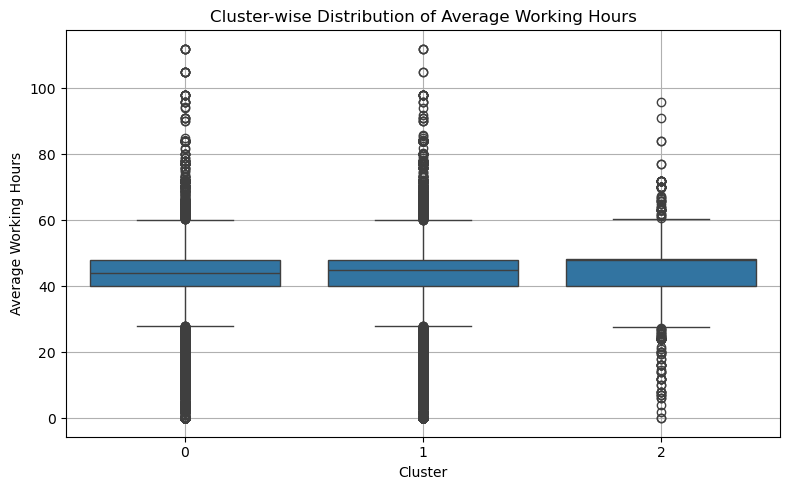

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='avg_hours_worked', data=grouped) 
plt.title('Cluster-wise Distribution of Average Working Hours')
plt.xlabel('Cluster')
plt.ylabel('Average Working Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

This generates a boxplot to visualize the distribution of `avg_hours_worked` across different clusters in the dataset. It uses seaborn's `boxplot()` function, where:
- x='`cluster`' groups the data by cluster labels (from previous clustering analysis),
- y='`avg_hours_worked`' shows the average number of hours worked by individuals in each cluster,
- data=grouped specifies the DataFrame containing the clustered and grouped data.

The plot is sized using plt.figure(figsize=(8, 5)) for better readability, and grid lines are added for easier interpretation. tight_layout() ensures the plot elements don't overlap, and plt.show() displays the plot.

**Explanation of Boxplot:**  
- A boxplot is ideal for summarizing distribution, central tendency, and variability in a single visual. It also effectively highlights outliers, which are important in labor economics when analyzing potential overwork, underemployment, or irregular schedules. This type of visualization helps compare clusters at a glance, making it easier to assess how different segments of the population experience working hours.
- Each box represents the interquartile range (IQR) of average working hours for individuals in each cluster:
- The central line inside each box is the median.
- The ends of the box represent the 25th (Q1) and 75th (Q3) percentiles.
- Whiskers extend to show the range within 1.5×IQR from the quartiles.
- Dots outside the whiskers indicate outliers, or individuals with unusually high or low average working hours.

**Interpretation:**
- The median working hours are fairly consistent across clusters.
- However, each cluster contains outliers working significantly more (or less) than the typical range.
- This distribution suggests that while the core working hour patterns are similar, some individuals or groups within each cluster may face highly irregular working conditions.

### b. Distribution of Average Wage Per Cluster

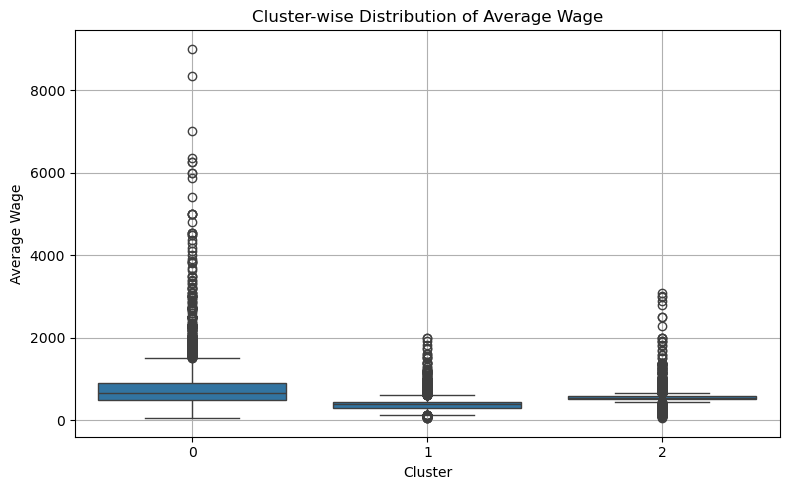

In [123]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='avg_wage', data=grouped)
plt.title('Cluster-wise Distribution of Average Wage')
plt.xlabel('Cluster')
plt.ylabel('Average Wage')
plt.grid(True)
plt.tight_layout()
plt.show()

This creates a boxplot to illustrate the distribution of average wage across different clusters.
- x='`cluster`' categorizes individuals based on the clusters formed in a prior step (e.g., via KMeans),
- y='`avg_wage`' plots the average wage per person in each cluster,
- data=grouped provides the summarized dataset being visualized.
  
The figure is sized appropriately for visibility using figsize=(8, 5), and layout functions ensure it is cleanly rendered.

**Interpretation:**
- Cluster 0 has a wider range of average wages with several extreme high outliers going beyond 8000, indicating the presence of high-income earners in this group.
- Clusters 1 and 2 have lower medians and much narrower distributions, suggesting that these groups have more consistent and lower average wage levels.
- The box for Cluster 0 is also taller, meaning its wage data is more spread out, reflecting greater income disparity.

This visualization implies that Cluster 0 may represent higher-skilled or more urbanized workers, while Clusters 1 and 2 may correspond to lower-wage earners or more homogeneous labor sectors.

### c. Wage vs. Hours per Cluster

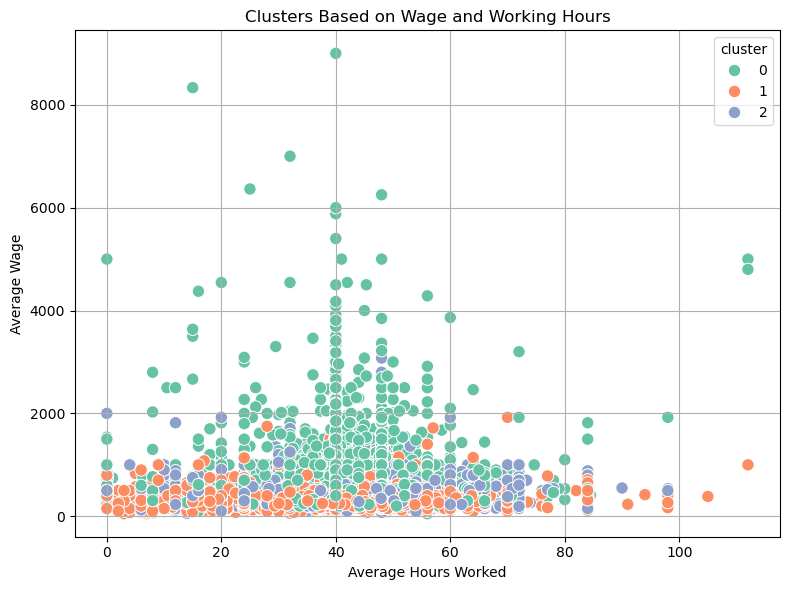

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped, x='avg_hours_worked', y='avg_wage', hue='cluster', palette='Set2', s=80)
plt.title('Clusters Based on Wage and Working Hours')
plt.xlabel('Average Hours Worked')
plt.ylabel('Average Wage')
plt.grid(True)
plt.tight_layout()
plt.show()

This generates a scatter plot to visualize how individuals or groups are clustered based on their average number of hours worked and average wage. The purpose is to understand the relationship between labor input and compensation, segmented by cluster.

**Interpretation:**  
Each point represents a group of individuals, characterized by their educational attainment, average hours worked, and average wage:

- Cluster 0 (College Graduate – green):  
This group is the most diverse in terms of both working hours and wages. They are concentrated around the standard 40-hour workweek, but some also work very long hours (60+), and a few work very few hours. In terms of wages, this group includes the highest earners, with several data points above 6000–8000 in average wage. This indicates that college graduates tend to have better earning potential, with access to both higher-paying jobs and more flexible work hours.

- Cluster 1 (Other education – orange):  
This group mostly falls in the low-wage bracket, generally earning under 1000, with a wide range of hours worked — some even exceeding 100 hours. This suggests precarious or informal employment, where individuals may need to work long hours for very low pay. The "Other" category likely includes those with either no formal education or education levels below college graduate, highlighting their economic vulnerability.

- Cluster 2 (Elementary Graduate – purple):  
This group shows a tighter clustering around 40–60 hours per week, with average wages mostly below 2000. While slightly better off than the "Other" group, their wages remain modest. This suggests that elementary graduates have slightly more stability, but still face limited upward mobility compared to college graduates.

**Summary** 
- Education level clearly correlates with wage potential, with college graduates dominating the higher wage spectrum.
- The "Other" group faces the most economic hardship, combining low wages with highly variable working hours.
- Elementary graduates sit in the middle — modest wages and somewhat standardized hours, but with limited access to higher-paying jobs.
  
The scatter plot reveals not just clustering but also inequality tied to educational attainment, underscoring the role of education in labor market outcomes.

### d. Multivariate Pairplot

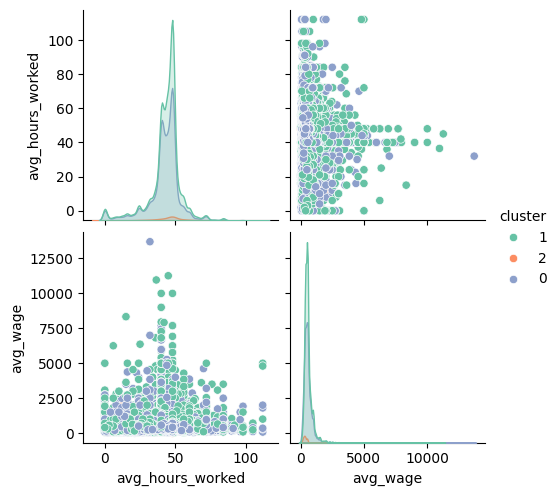

In [61]:
# 4. Multivariate pairplot
merged = grouped.copy()
merged['cluster'] = grouped['cluster'].astype(str)
sns.pairplot(merged[['avg_hours_worked', 'avg_wage', 'cluster']], hue='cluster', palette='Set2')
plt.show()

This generates a pairplot to examine the bivariate relationships and distributions between average hours worked and average wage, segmented by educational attainment clusters. The pairplot provides:

- Scatter plots for each pair of variables (e.g., avg_hours_worked vs avg_wage).
- Kernel density estimations (KDEs) on the diagonal, showing the distribution of each variable by cluster.

**Diagonal KDE Plots:**
- avg_hours_worked:
  - Most individuals, across all clusters, work around 40 hours per week, as indicated by the high peak.
  - College graduates and elementary graduates show similar work hour patterns.

- avg_wage:
  - College graduates (blue) show a wider spread in wages, including much higher earnings compared to the other groups.
  - The “Other” and “Elementary Graduate” clusters (green and orange) have sharply peaked distributions at lower wage levels, suggesting concentration in lower-paying jobs.

**Scatter Plots:**
- avg_hours_worked vs avg_wage:
  - There is no strong linear relationship between hours worked and wage — many individuals working long hours still earn low wages, especially in the “Other” and “Elementary Graduate” groups.
  - College graduates (Cluster 0) tend to cluster in the higher wage range, with greater wage variation, even at standard or fewer work hours.

### e. Trend of Average Wages Over Time 

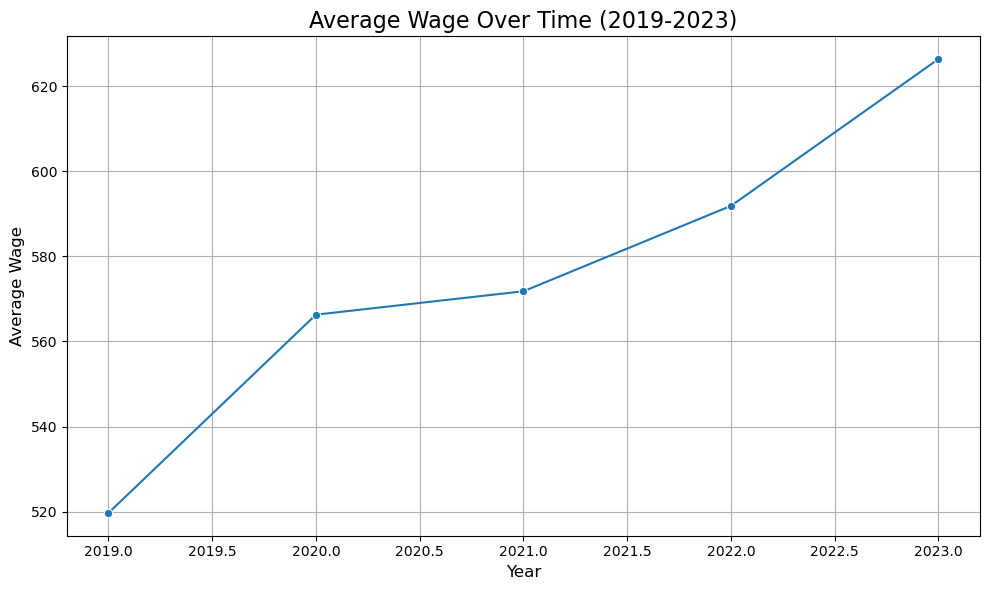

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_wage_by_year, x='year', y='avg_wage', marker='o')
plt.title('Average Wage Over Time (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wage', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:**
This line plot shows how average wages have changed year over year from 2019 to 2023:

- 2019: Average wage started at around ₱519.
- 2020: Sharp increase to about ₱567, possibly reflecting policy changes, inflation adjustments, or labor market shifts during the early pandemic.
- 2021: A slight increase to around ₱571, indicating wage stagnation or slow recovery during ongoing economic uncertainty.
- 2022: Noticeable rise to about ₱592, showing economic rebound or minimum wage hikes.
- 2023: Strong growth reaching approximately ₱626, continuing the upward trend.

The chart reveals a steady upward trend in average wages over the five-year period, despite global disruptions like the COVID-19 pandemic. The most substantial increases occurred in:

- 2020, likely as an immediate economic response, and
- 2023, possibly due to recovery measures, labor negotiations, or inflation-driven adjustments.

This trend suggests positive wage growth, though the moderate rise in 2021 implies that not all years experienced robust improvement. It would be valuable to further analyze this wage growth by education level or industry to understand who benefited the most from these changes.

### f. Predicated Average Wage by Education Level

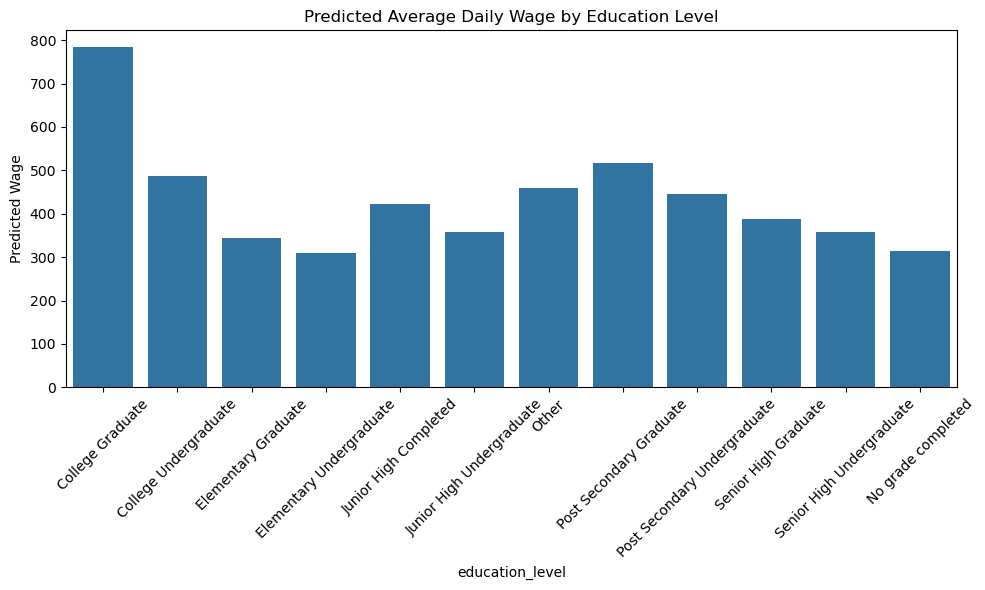

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='education_level', y='predicted_wage', errorbar=None)
plt.xticks(rotation=45)
plt.title("Predicted Average Daily Wage by Education Level")
plt.ylabel("Predicted Wage")
plt.tight_layout()
plt.show()

**Interpretation:**  
- College Graduates have the highest predicted wage compared to other groups
- There is a steep jump between College Undergraduate and College Graduate.
- Some lower levels such as the Post-Secondary Graduate have higher predicted wages compared to other groups. This indicates that the quality of education might influence wage outcome, not just years completed.
- No grade completed shows the lowest predicted wage, indicating the importance of education and the economic disadvantage tied to educational access.
- Other category might include special courses sucg as self-taught education found in the internet, or alternatives of education not captured within the standard categories.

### g. Predicted Wage Over Time

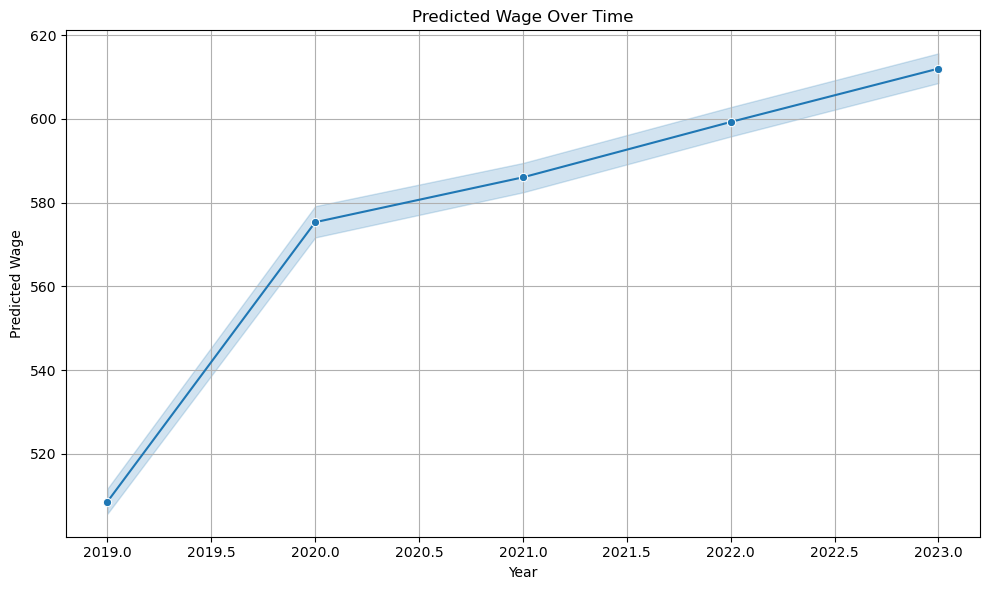

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='year', y='predicted_wage', marker='o')
plt.title("Predicted Wage Over Time")
plt.xlabel("Year")
plt.ylabel("Predicted Wage")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:**
- 2019: At the initial stages of the pandemic, predicted wages started at the lowest level of ₱510.
- 2020: Moving forward to 2020, there was a steep rise from 2019 to ₱575. This may be linked to the reform, wage adjustments, government aid, subsidies or labor force shifts as workers became a larger share of employment.
- 2021: There has been a modest yet visible rise to ₱585. There has been a rise however the rate is not as high from 2019 to 2020, signaling a wage stagnation revealing the implicit effects of the pandemic and the uncertainty it brought.
- 2022: The growth was gradual yet continued, reaching around ₱598. This can be due to minimum wage updates and initial yet promising phases of economic reopening.
- 2023: The predicted wage climb continued to levels of ₱615. The rise lead to a strong recovery momentum, most likely due to a success in economic reopening, inflation-driven adjustments, or improved productivity. This could mean that the world has been getting used to the pandemic, signalling a recovery.

Overall, the trend suggests a consistent upward movement in predicted wages across the five-year span. The most notable growth occurred in:
- 2020, most likely due to focused efforts of governments and organizations towards economic intervention and the start of the trend of the digital age (especially online jobs), and
- 2023, reflecting macroeconomic recovery and restructuring of the labor market, taking into account the benefits brought by online opportunities.

The general trend is positive. The flat growth in 2021 shows stagnancy but not necessarily in a bad way. It hints structural constraints, temporary labor disruptions, or sector-specific challenges. 

### h. Predicted Wage By Region

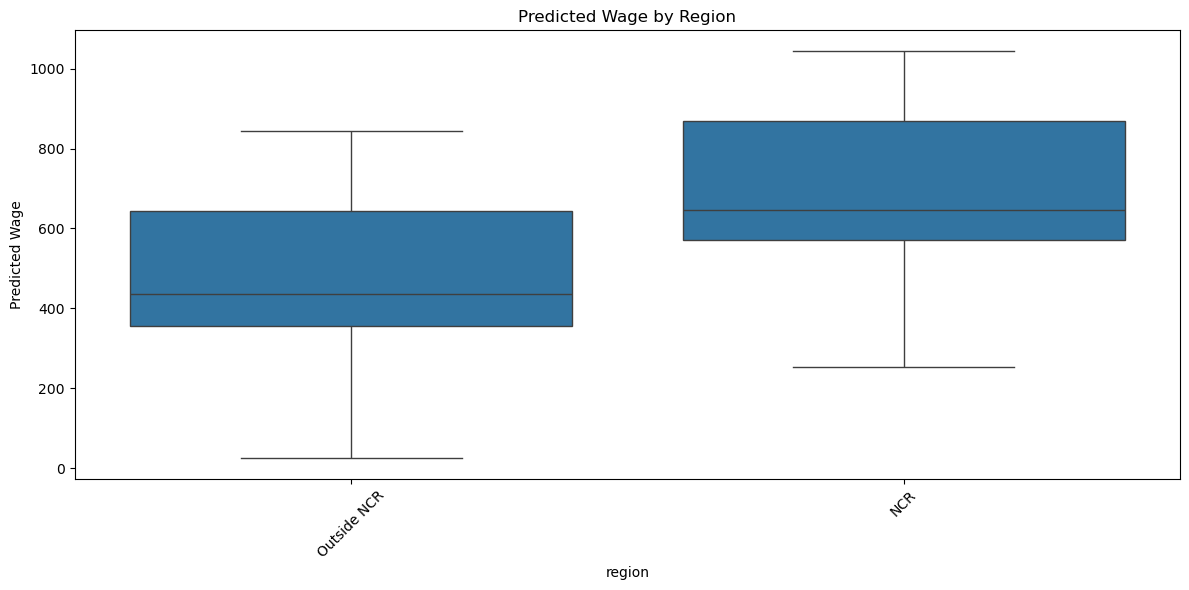

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped, x='region', y='predicted_wage')
plt.title("Predicted Wage by Region")
plt.xticks(rotation=45)
plt.ylabel("Predicted Wage")
plt.tight_layout()
plt.show()

**Interpretation:**
NCR (National Capital Region) has higher predicted wages overall:
- The median wage is visible higher than regions outside NCR.
- The interquartile rage or middle 50% is shifted upward, although high for all regions, mid-level wages in NCR still exceed higher-end wages outside NCR.
- The maximum predicted wages in NCR exceed those outside NCR. This could mean that there are more high-paying opportunities in cities with high economic activity

Outside NCR shows:
- Though not gigantic, the distribution of predicted wages outside NCR is lower that in NCR.
- A lower median and a wider spread of values, indicating more outliers in wages outside NCR.
- A longer lower whisker implies a noticeable wage inequality or a higher number of lower paying jobs in regional areas that are not highly urbanized.

These distributions indicate a wage gap between highly urbanized areas and rural regions. People from NCR benefit from a higher pay on average compared to people outside NCR. There is evidently a regional wage disparity. 